# https://github.com/Porini-Education/Course_ITS-BigData-1Anno_2023

# Greek Run (Corsa Greca)

Usare numpy e matplotlib per simnulare la corsa greca.
La corsa ha le seguenti regole:
- ci sono 5 giocatori che cominciano nelle posizioni 0, 20, 40, 60, 80
- i giocatori si muovono di un passo ogni turno
- i giocatori 1,2,3,4 si muovono verso destra, il giocatore 5 si muove verso sinistra
- se due giocaatori si incontrano, cambiano direzione
- se un giocatore esce dall'area di gioco (0, 100) ha finito la corsa
- l'ultimo a finire, perde

Chi perde?

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import time

In [37]:
#Parte 1
# creare matrici con le posizioni, le direzioni e se sono ancora in gioco
# assgnare a ogni giocatore una posizione iniziale e una direzione iniziale (1 verso destra, -1 verso sinistra)

posizioni = np.array([0,20,40,60,80])
direzioni = np.array([1,1,1,1,-1])
in_gioco = np.ones(5, dtype=bool) # np.array([True,True,True,True,True])

colori = ['r', 'g', 'b', 'y', 'm']
segnaposti = ['o', 'v', '^', '<', '>']

Text(0.5, 0.98, 'Greek Run')

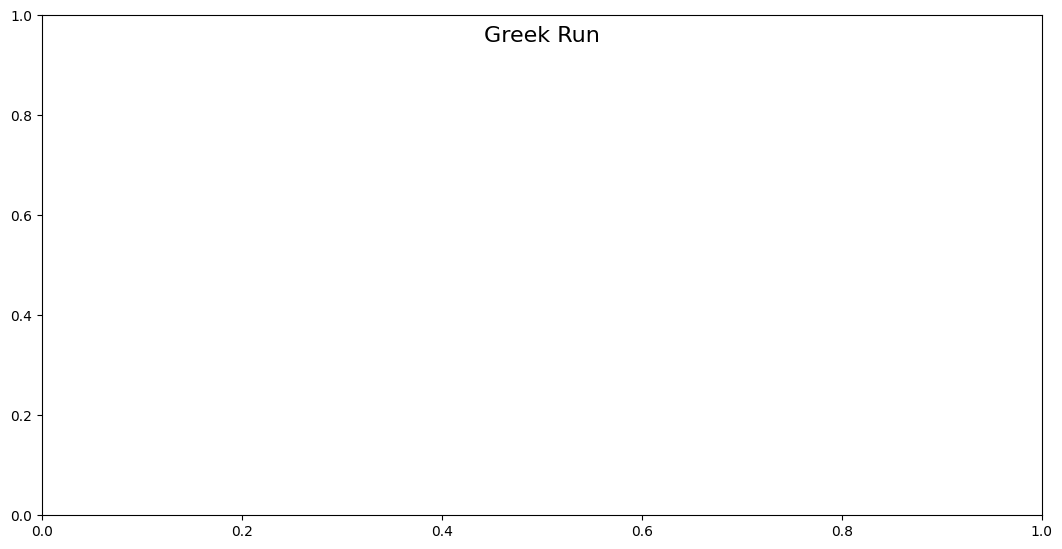

In [38]:
#Parte 2
# inizializzare il grafico (l'area di gioco)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
fig.suptitle('Greek Run', fontsize=16)

In [39]:
#ripasso zip
for x in zip(posizioni, colori, segnaposti):
    print(x) # stampa la tupla di pos, col e segnaposto
    print(x[0]) # stampa la posizione

(0, 'r', 'o')
0
(20, 'g', 'v')
20
(40, 'b', '^')
40
(60, 'y', '<')
60
(80, 'm', '>')
80


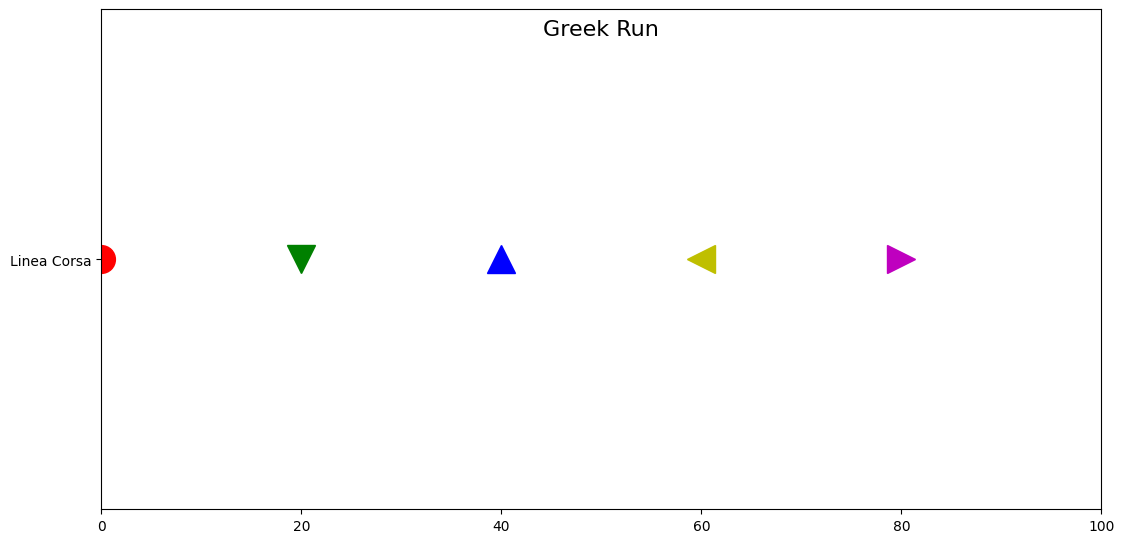

In [40]:
#Parte 3
# usare la funzione zip per creare il grafico
# useremo la funzione plot per creare i punti
# imposteremo il grafico con xlim (0,100) e ylim (-2,2)

def plot_corsa():
    for giocatore in zip(posizioni, colori, segnaposti):
        ax.plot(giocatore[0], 0, color=giocatore[1], marker=giocatore[2], markersize=20)
        ax.set_xlim(0, 100)
        ax.set_ylim(-2, 2)
        ax.set_yticks([0]) # mette una tacca sull'asse y dove y=0
        ax.set_yticklabels(['Linea Corsa'])

    display.clear_output(wait=True)
    display.display(fig)

plot_corsa()

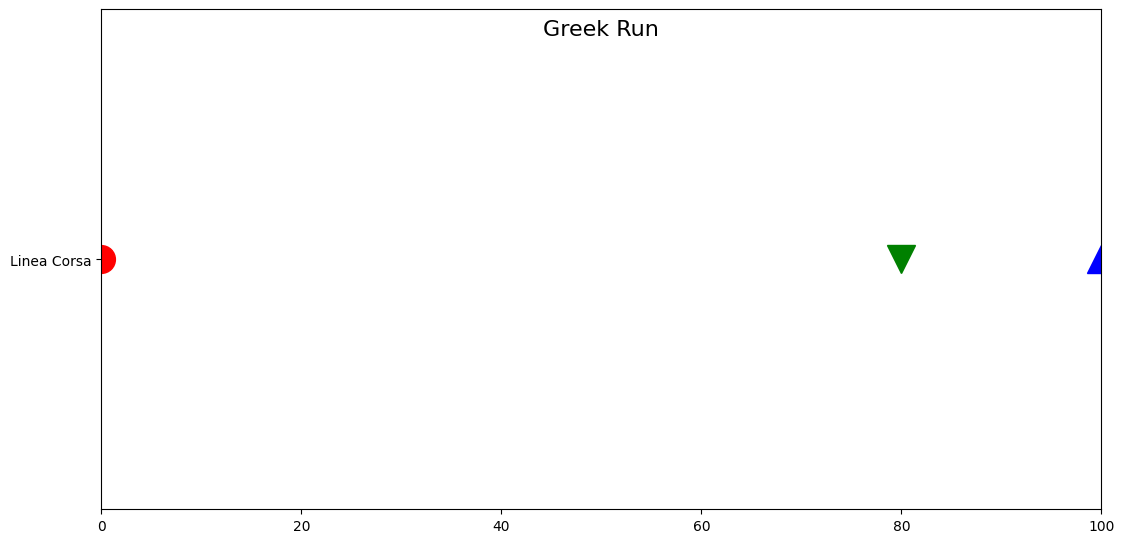

In [41]:
#Parte 4
# fare avanzare i giocatori rispettando la direzione
# continuare finché resta un solo giocatore attivo

contapassi = 0
while len(in_gioco[in_gioco==True]) > 1: #finché c'è almeno un giocatore in gioco
    contapassi += 1
    #avanzano i giocatori
    posizioni += direzioni # posizioni = posizioni + direzioni
    in_gioco[posizioni >= 100 ] = False # se la posizione è maggiore di 100, il giocatore è fuori
    in_gioco[posizioni <= 0] = False # se la posizione è minore di 0, il giocatore è fuori

    for i in range(len(posizioni)-1):
        if posizioni[i] == posizioni[i+1]:
            direzioni[i] = -direzioni[i] 
            direzioni[i+1] *= -1 #un'alternativa alla riga sopra
        
    ax.clear()

    plot_corsa()

    time.sleep(0.1)
    

In [48]:
#Chi ha perso?
for i in range(len(in_gioco)):
    if in_gioco[i] == True:
        print('Il giocatore', i+1, 'ha perso!')
        break

# totale passi = contapassi + passi rimasti all'ultimo giocatore
if direzioni[i] == 1:
    passi_restanti = 100 - posizioni[i]
else:
    passi_restanti = posizioni[i]

totale_passi = contapassi + passi_restanti
print(f'la corsa è durata {totale_passi} passi')
print(f'Il giocatore {i+1} è rimasto a {passi_restanti} dalla fine')

Il giocatore 2 ha perso!
la corsa è durata 100 passi
Il giocatore 2 è rimasto a 20 dalla fine


In [61]:
# esempi di calcolo del tempo della corsa
print('supponendo che ogni passo sia di 1 secondo, la corsa è durata', totale_passi/60, 'minuti')
print(f'supponendo che ogni passo sia di 1 secondo, la corsa è durata {totale_passi/60:.2f} minuti')
tot_min = totale_passi//60
print('uguale a: ', tot_min, 'minut'+('i' if tot_min>1 else 'o'), 'e ', totale_passi%60, 'secondi')

import datetime
timedelta = datetime.timedelta(seconds=float(totale_passi))
print(f'la corsa è durata {timedelta}')

supponendo che ogni passo sia di 1 secondo, la corsa è durata 1.6666666666666667 minuti
supponendo che ogni passo sia di 1 secondo, la corsa è durata 1.67 minuti
uguale a:  1 minuto e  40 secondi
la corsa è durata 0:01:40
